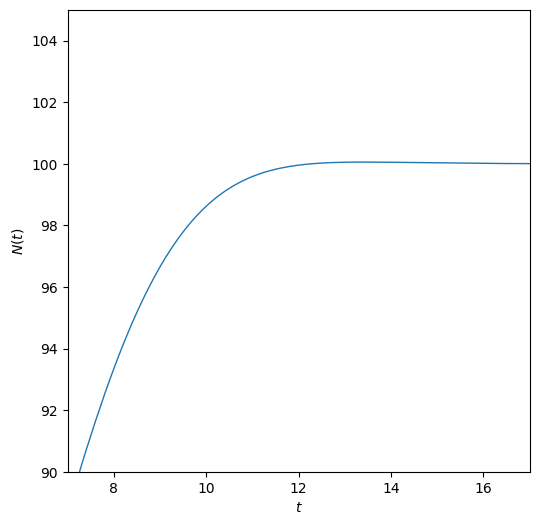

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint
import sys


# Numerical solver
T = 5
T_end = T*5
dt = 0.1
t = np.linspace(0,T_end,int(T_end/dt)+1)
T_i = np.linspace(0,T,int(T/dt)+1)
N0 = lambda t: 50

def model(Y, t, d):
    N = Y(t)
    Nd = Y(t-d)
    r = 0.1
    K = 100
    A = 20
    dNdt_solver = r*N*(1-Nd/K)*(N/A-1)
    return dNdt_solver

# Hopf bif. between T = 3.9 and 4.0
d = 1.1
N_solver = ddeint(model, N0, t, fargs=(d,))

# for d in T_i:
#     # 1.1b) damped oscillations starts at around d = 4.4
    # N_solver = ddeint(model, N0, t, fargs=(d,))
    # ax.plot(t, N_solver, linewidth=1, label='delay = %.01f'%d)
    # break

# Plotting solver
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(t, N_solver, linewidth=1, label='delay = %.01f'%d)
ax.set_xlabel('$t$')
ax.set_ylabel('$N(t)$')
ax.set_xlim([7,17])
ax.set_ylim([90,105])
ax.set_box_aspect(1) 

# plt.legend(loc="upper left")
title = '/1.1b Start of damped oscillations, T={}'.format(d)
location = r'C:\Users\erikn\OneDrive - Chalmers\Computational Biology\CB HW 1'
plt.savefig(location+title+'.png')
plt.show()